# Things to do 

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import sklearn
import mglearn
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
%matplotlib inline

/home/simran/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/simran/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Data Loading & Cleaning

In [2]:
data = pd.read_csv('/home/simran/Data Analysis/Mushroom Analysis/mushrooms.csv')

In [3]:
data['class'].replace('p','poisonous', inplace=True)
data['class'].replace('e','edible', inplace=True)

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.shape

(8124, 23)

In [7]:
data = data.dropna(axis=0)

In [8]:
data.shape

(8124, 23)

# Data Visualization

In [ ]:
Selected features are - Bruises, gill size, odor

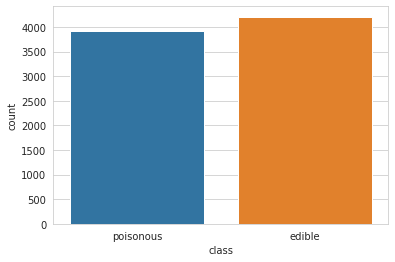

In [9]:
sns.countplot(x='class', data=data)

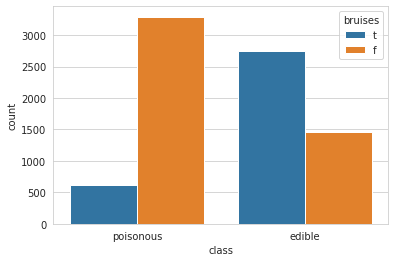

In [10]:
sns.countplot(x='class', data=data, hue ='bruises')

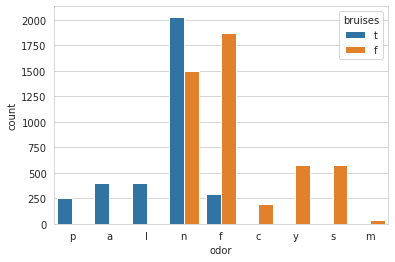

In [11]:
sns.countplot(x='odor', data=data, hue ='bruises')

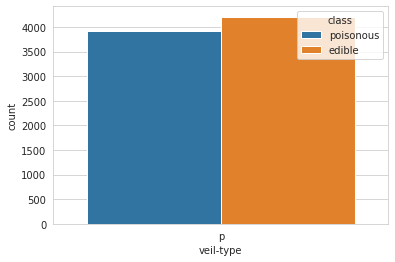

In [12]:
sns.countplot(x='veil-type', data=data, hue ='class')

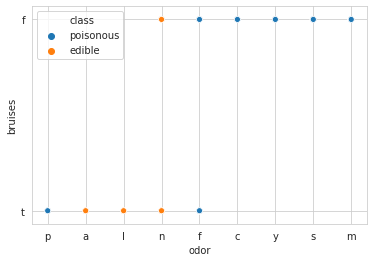

In [13]:
sns.scatterplot(x='odor',y = 'bruises', data=data, hue ='class')

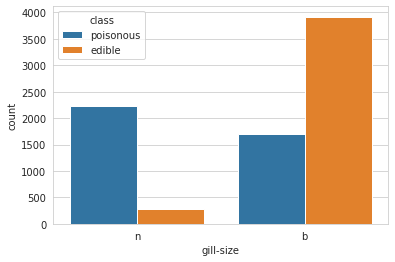

In [14]:
# mushrooms related to habitat

sns.countplot(x='gill-size', data=data, hue ='class')

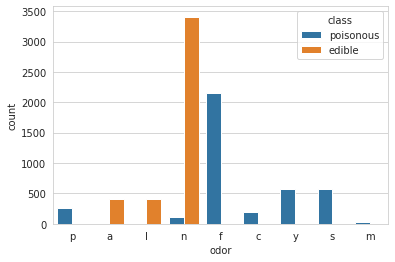

In [69]:
sns.countplot(x='odor', data=data, hue ='class')

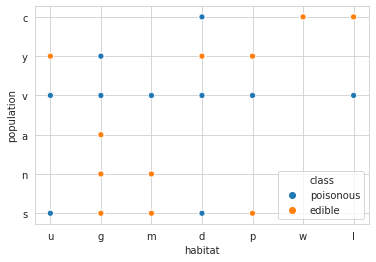

In [16]:
sns.scatterplot(x='habitat',y = 'population', data=data, hue ='class')

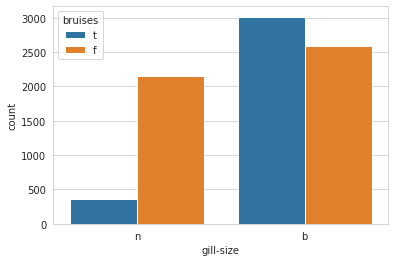

In [70]:
sns.countplot(x='gill-size', data=data, hue ='bruises')

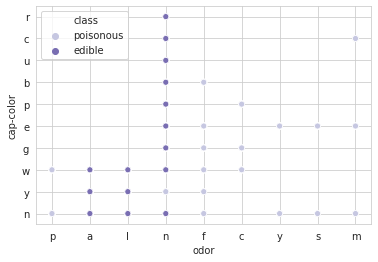

In [18]:
#cmap = sns.cubehelix_palette(dark=.2, as_cmap=True)
sns.scatterplot(x="odor", y="cap-color",
                     hue="class",palette="Purples", sizes=(20, 200),
                     data=data)

# Splitting Data into X & y

In [19]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
y = data['class']

In [21]:
data_features = ['bruises', 'gill-size','odor']

In [22]:
X = data[data_features]

In [23]:
X.head()

,bruises,gill-size,odor
0,t,n,p
1,t,b,a
2,t,b,l
3,t,n,p
4,f,b,n


In [24]:
X.shape

(8124, 3)

In [25]:
y.shape

(8124,)

In [26]:
y.head()

0    poisonous
1       edible
2       edible
3    poisonous
4       edible
Name: class, dtype: object

In [27]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bruises_f,bruises_t,gill-size_b,gill-size_n,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0


In [28]:
#splitting the dataset into test and train dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state =42)


In [29]:
# Feature Scaling on X_test and X_tarin

from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
X_test

array([[2.03127018, 0.        , 2.14541509, ..., 0.        , 0.        ,
        0.        ],
       [2.03127018, 0.        , 0.        , ..., 0.        , 0.        ,
        3.76641055],
       [2.03127018, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.03127018, 2.14541509, ..., 0.        , 0.        ,
        0.        ],
       [2.03127018, 0.        , 2.14541509, ..., 0.        , 0.        ,
        0.        ],
       [2.03127018, 0.        , 0.        , ..., 0.        , 0.        ,
        3.76641055]])

In [77]:
# initializing the model and feeding in data

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [78]:
y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, y_predict)

In [79]:
score 

0.9108813392417529

In [34]:
print("Accuracy is {}".format(score*100))

Accuracy is 91.08813392417528


In [35]:
clf.score(X_train,y_train)

0.9207287050713934

In [36]:
clf.score(X_test, y_test)

0.9108813392417529

In [37]:
y_predict

array(['edible', 'poisonous', 'poisonous', ..., 'edible', 'edible',
       'poisonous'], dtype=object)

In [38]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix( y_test, y_predict)
cr = classification_report(y_test, y_predict)

In [39]:
print('Classification Report :\n {}'.format(cr))

Classification Report :
               precision    recall  f1-score   support

      edible       0.85      1.00      0.92      1040
   poisonous       1.00      0.82      0.90       991

    accuracy                           0.91      2031
   macro avg       0.93      0.91      0.91      2031
weighted avg       0.92      0.91      0.91      2031



In [40]:
print('Confusion Matrix :\n {}'.format(cm))

Confusion Matrix :
 [[1040    0]
 [ 181  810]]


We dont want the model to be either over-fiited or under-fitted, hence 91% accuracy is good

# Checking Score with Critrerion = entropy

In [41]:
ent = DecisionTreeClassifier(criterion ='entropy',max_depth=2, random_state=0)
ent.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [42]:
ent_predict = ent.predict(X_test)

from sklearn.metrics import accuracy_score 
ent_score = accuracy_score(y_test, ent_predict)

In [43]:
ent_score

0.9108813392417529

In [44]:
print("Accuracy is {}".format(ent_score*100))

Accuracy is 91.08813392417528


In [45]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix( y_test.values, ent_predict)
cr = classification_report(y_test, ent_predict)

In [46]:
cm

array([[1040,    0],
       [ 181,  810]])

In [47]:
cr

'              precision    recall  f1-score   support\n\n      edible       0.85      1.00      0.92      1040\n   poisonous       1.00      0.82      0.90       991\n\n    accuracy                           0.91      2031\n   macro avg       0.93      0.91      0.91      2031\nweighted avg       0.92      0.91      0.91      2031\n'

In [48]:
# Plotting out the tree

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = 'tree.dot',class_names=['Poisonous','Edible'],feature_names =X_dummies.columns,
                impurity = False, filled = True)

In [49]:
conda install python-graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


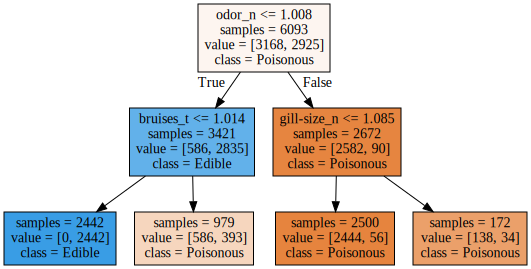

In [50]:
# Viewing the tree over kernel

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [80]:
#Converting .dot file into .png

from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','clf.png'])

0

In [51]:
# Plotting out the tree for entropy

from sklearn.tree import export_graphviz
export_graphviz(ent, out_file = 'ent.dot',class_names=['Poisonous','Edible'],feature_names =X_dummies.columns,
                impurity = False, filled = True)

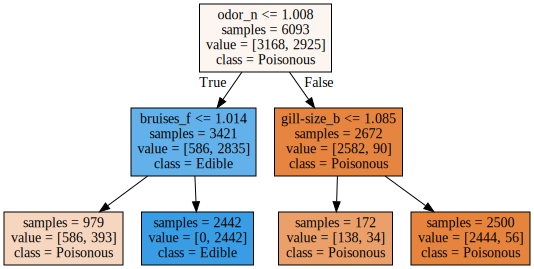

In [52]:
# Viewing the tree over kernel

import graphviz

with open("ent.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [81]:
#Converting .dot file into .png

from subprocess import check_call
check_call(['dot','-Tpng','ent.dot','-o','ent.png'])

0

# Feature Importance 

In [53]:
y_train.shape

(6093,)

In [54]:
# For GINI index
clf.feature_importances_

array([0.        , 0.20803469, 0.        , 0.00410771, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7878576 ,
       0.        , 0.        , 0.        ])

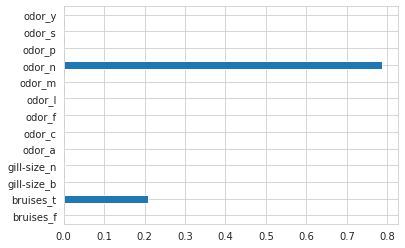

In [55]:
# Visualising feature importance
#X_dummies = pd.DataFrame(X_dummies)
feat_importances = pd.Series(clf.feature_importances_, index=X_dummies.columns) #coverting arrays to series 
feat_importances.plot(kind='barh') # bar horizontal

In [56]:
# For entropy
ent.feature_importances_

array([0.28300202, 0.        , 0.01248804, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.70450994,
       0.        , 0.        , 0.        ])

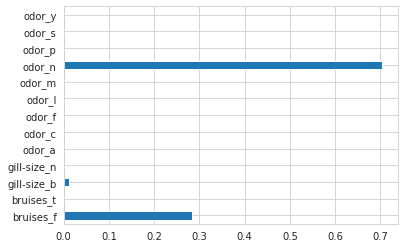

In [57]:
# Visualising feature importance

feat_importances = pd.Series(ent.feature_importances_, index=X_dummies.columns) #coverting arrays to series 
feat_importances.plot(kind='barh') # bar horizontal

In [58]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

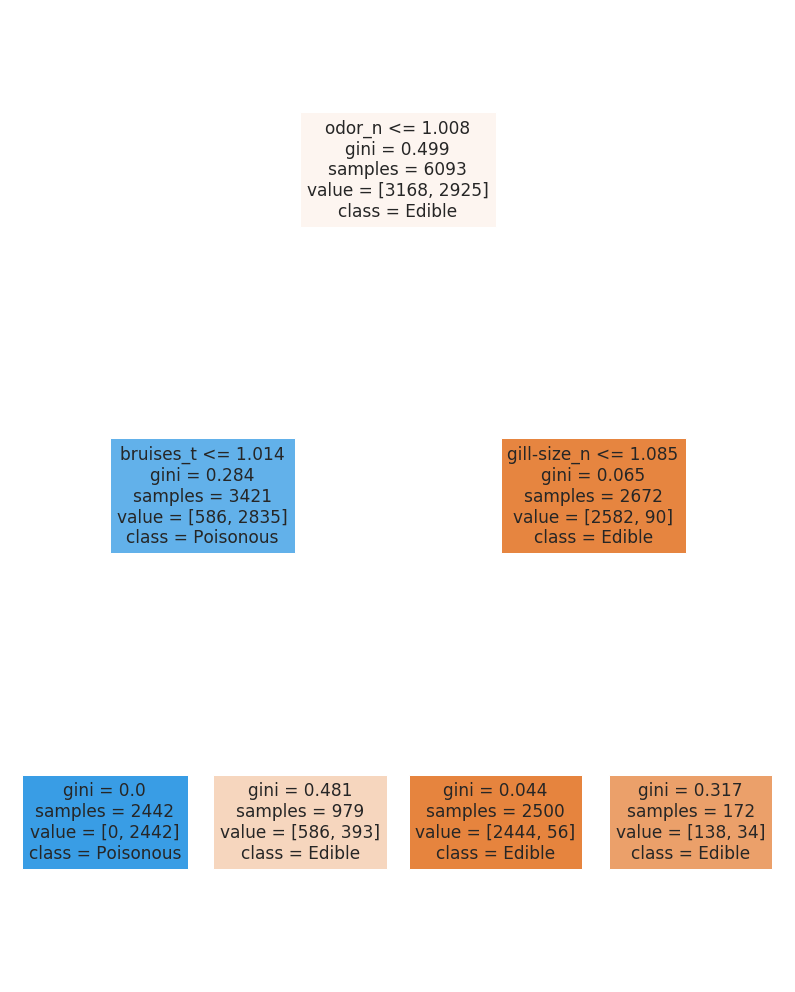

In [59]:
#Visualizing the tree using sklearn

from sklearn import tree

plt.figure(figsize = (14, 18))
tree.plot_tree(clf, filled = True,class_names=['Edible','Poisonous'], feature_names = X_dummies.columns)
plt.show()

In [60]:
df = pd.DataFrame(X_train, columns = X_dummies.columns)

In [61]:
df

,bruises_f,bruises_t,gill-size_b,gill-size_n,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,2.028456,0.000000,0.000000,2.170148,0.0,6.474387,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,2.028456,0.000000,2.170148,0.000000,0.0,0.000000,2.265702,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,2.028456,2.170148,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2.015285,0.0,0.0,0.0
3,2.028456,0.000000,2.170148,0.000000,0.0,0.000000,2.265702,0.000000,0.0,0.000000,0.0,0.0,0.0
4,2.028456,0.000000,0.000000,2.170148,0.0,0.000000,2.265702,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2.028456,0.000000,0.000000,2.170148,0.0,0.000000,2.265702,0.000000,0.0,0.000000,0.0,0.0,0.0
6089,0.000000,2.028456,2.170148,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2.015285,0.0,0.0,0.0
6090,0.000000,2.028456,2.170148,0.000000,0.0,0.000000,0.000000,4.704555,0.0,0.000000,0.0,0.0,0.0
6091,2.028456,0.000000,0.000000,2.170148,0.0,0.000000,2.265702,0.000000,0.0,0.000000,0.0,0.0,0.0


In [62]:
ytrain_df =  pd.DataFrame(y_train)

In [63]:
type(ytrain_df)

pandas.core.frame.DataFrame

# Making Prediction 

In [64]:
X_new = np.array([[0,1,0,1,1,0,0,0,0,0,0,0,0]])
prediction = clf.predict(X_new)

In [65]:
prediction

array(['poisonous'], dtype=object)

In [66]:
new = np.array([[1,0,1,1,0,0,0,0,0,0,0,0,0]])

In [67]:
prediction= ent.predict(new)
print('Prediction: {}'.format(prediction))

Prediction: ['edible']


In [68]:
prediction= clf.predict(new)
print('Prediction: {}'.format(prediction))

Prediction: ['poisonous']


# Thank you!